# Download the libraries


In [1]:
!pip install tensorflow numpy opencv-python pillow scikit-learn


# Pre processing script

In [7]:
import os

import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Parameters
IMG_SIZE = 32  # Small size for speed
DATA_DIR = "data"
CATEGORIES = ["person", "military_person"]

# Load and preprocess images
def load_data():
    data = []
    labels = []
    for category in CATEGORIES:
        path = os.path.join(DATA_DIR, category)
        class_num = CATEGORIES.index(category)  # 0 for person, 1 for military_person
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                img_array = img_array / 255.0  # Normalize to [0, 1]
                data.append(img_array)
                labels.append(class_num)
            except Exception as e:
                print(f"Error loading image: {e}")
    return np.array(data), np.array(labels)

# Load data
X, y = load_data()

# Split into train and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Validation samples: {X_val.shape[0]}")

Training samples: 261, Validation samples: 175


*Without Augmentation*

# Small CNN architecture without Dropout layer

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build the CNN model
def create_model():
    model = models.Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])
    return model

model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/opt/anaconda3/envs/object_detection_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78,945 (308.38 KB)

 Trainable params: 78,945 (308.38 KB)

 Non-trainable params: 0 (0.00 B)

## Training using 10 epochs

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5189 - loss: 0.6960 - val_accuracy: 0.4914 - val_loss: 0.6695
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5888 - loss: 0.6534 - val_accuracy: 0.6286 - val_loss: 0.6242
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7029 - loss: 0.5926 - val_accuracy: 0.7486 - val_loss: 0.5684
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7748 - loss: 0.5328 - val_accuracy: 0.8171 - val_loss: 0.4791
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8386 - loss: 0.4470 - val_accuracy: 0.6343 - val_loss: 0.6188
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7940 - loss: 0.4411 - val_accuracy: 0.8171 - val_loss: 0.4127
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8754 - loss: 0.3499 - val_accuracy: 0.8571 - val_loss: 0.3702
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8907 - loss: 0.2842 - val_accuracy: 0.8286 - val_loss: 0.3421


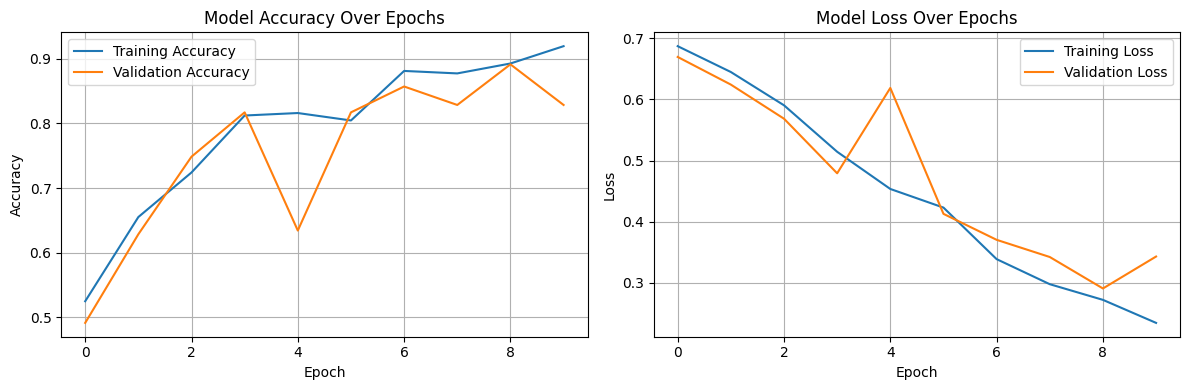

In [3]:
history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(X_val, y_val))

model.save('military_classifier_50_epoch.keras')

from matplotlib import pyplot as plt
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot (optional, for extra insight)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Training using 20 epochs

Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4940 - loss: 0.7012 - val_accuracy: 0.4857 - val_loss: 0.7164
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5598 - loss: 0.6746 - val_accuracy: 0.7886 - val_loss: 0.6353
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7408 - loss: 0.6079 - val_accuracy: 0.7657 - val_loss: 0.5672
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8523 - loss: 0.5126 - val_accuracy: 0.8171 - val_loss: 0.4697
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8338 - loss: 0.4205 - val_accuracy: 0.8171 - val_loss: 0.4205
Epoch 6/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8799 - loss: 0.3576 - val_accuracy: 0.7829 - val_loss: 0.4261
Epoch 7/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8311 - loss: 0.3581 - val_accuracy: 0.8286 - val_loss: 0.3829
Epoch 8/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9000 - loss: 0.2883 - val_accuracy: 0.8629 - val_loss: 0.3268


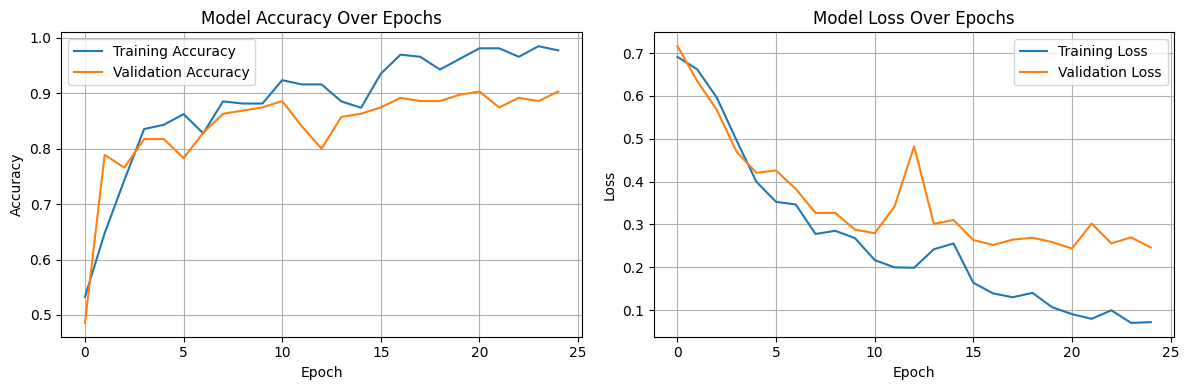

In [4]:

history = model.fit(X_train, y_train, 
                    epochs=25, 
                    batch_size=32, 
                    validation_data=(X_val, y_val))

model.save("military_classifier_25_epoch.h5")

from matplotlib import pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# CNN architecture including a Dropout layer

## Updating the model architectuire with a dropout layer

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_model():
    model = models.Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),  # Heavier dropout for dense layer

        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])

    return model

model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/opt/anaconda3/envs/object_detection_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,609 (221.13 KB)

 Trainable params: 56,609 (221.13 KB)

 Non-trainable params: 0 (0.00 B)

## Training for 25 epochs

Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4088 - loss: 0.7230 - val_accuracy: 0.6857 - val_loss: 0.6869
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6237 - loss: 0.6669 - val_accuracy: 0.5486 - val_loss: 0.6806
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5839 - loss: 0.6692 - val_accuracy: 0.7486 - val_loss: 0.6648
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6587 - loss: 0.6482 - val_accuracy: 0.7886 - val_loss: 0.6283
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6997 - loss: 0.6077 - val_accuracy: 0.7371 - val_loss: 0.5750
Epoch 6/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6759 - loss: 0.5886 - val_accuracy: 0.7200 - val_loss: 0.5585
Epoch 7/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7538 - loss: 0.4896 - val_accuracy: 0.7714 - val_loss: 0.5004
Epoch 8/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7609 - loss: 0.4716 - val_accuracy: 0.8000 - val_loss: 0.4829


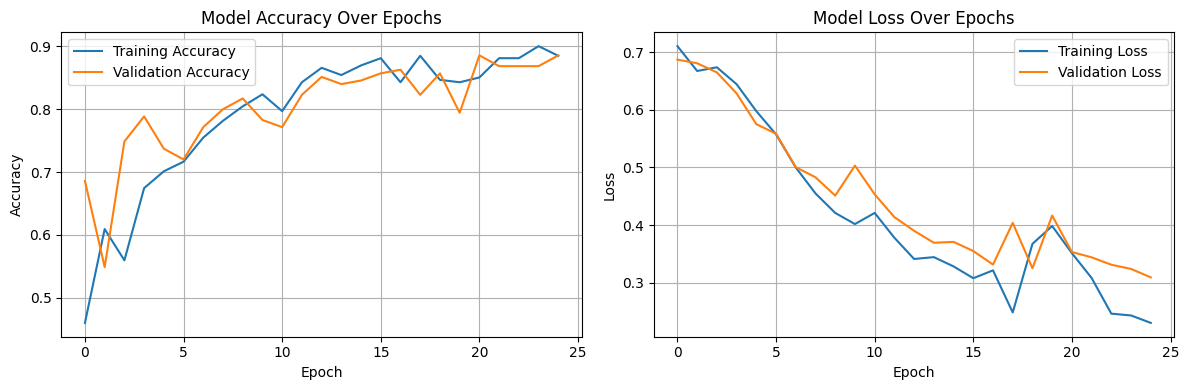

In [3]:
# Train the model
history = model.fit(X_train, y_train, 
                    epochs=25, 
                    batch_size=32, 
                    validation_data=(X_val, y_val))

model.save("military_classifier_25_epoch.h5")

from matplotlib import pyplot as plt
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


## Train the model for 50 epochs


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4015 - loss: 0.7309 - val_accuracy: 0.5086 - val_loss: 0.6918
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5101 - loss: 0.6949 - val_accuracy: 0.4857 - val_loss: 0.6906
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5209 - loss: 0.6989 - val_accuracy: 0.6114 - val_loss: 0.6901
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5739 - loss: 0.6840 - val_accuracy: 0.7371 - val_loss: 0.6869
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4973 - loss: 0.7002 - val_accuracy: 0.7371 - val_loss: 0.6834
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5159 - loss: 0.6772 - val_accuracy: 0.7543 - val_loss: 0.6746
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6386 - loss: 0.6515 - val_accuracy: 0.7543 - val_loss: 0.6613
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6920 - loss: 0.6474 - val_accuracy: 0.7143 - val_loss: 0.6359


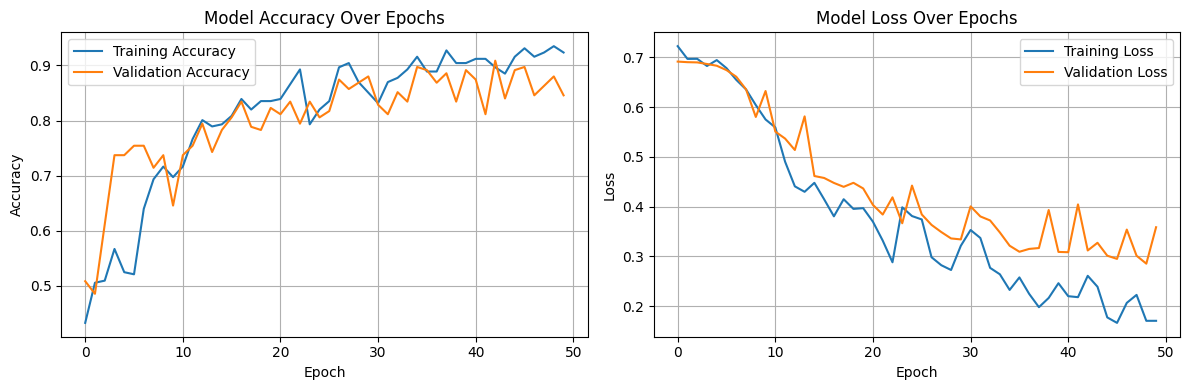

In [3]:
# Train the model
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_data=(X_val, y_val))

# Save the trained model
model.save("military_classifier_25_epoch.h5")

from matplotlib import pyplot as plt
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot (optional, for extra insight)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


# MobileNetV1 Architecture

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Parameters
IMG_SIZE = 32

# Depthwise separable convolution block (as in original MobileNetV1)
def depthwise_separable_conv(x, filters, strides=(1, 1), alpha=1.0):
    """Alpha controls the width (number of filters) of the network."""
    depthwise_filters = int(filters * alpha)
    x = layers.DepthwiseConv2D(kernel_size=3, strides=strides, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(max_value=6.0)(x)  # ReLU6 as in MobileNetV1
    x = layers.Conv2D(depthwise_filters, kernel_size=1, strides=(1, 1), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(max_value=6.0)(x)
    return x

# Build the modified MobileNetV1 model
def create_mobilenet_v1():
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    # Initial standard convolution (adjusted for 32x32 input)
    x = layers.Conv2D(32, kernel_size=3, strides=(2, 2), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(max_value=6.0)(x)  # ReLU6
    
    # MobileNetV1 body (reduced layers for simplicity and small input)
    x = depthwise_separable_conv(x, filters=64, strides=(1, 1))   # 16x16
    x = depthwise_separable_conv(x, filters=128, strides=(2, 2))  # 8x8
    x = depthwise_separable_conv(x, filters=128, strides=(1, 1))
    x = depthwise_separable_conv(x, filters=256, strides=(2, 2))  # 4x4
    x = depthwise_separable_conv(x, filters=256, strides=(1, 1))
    x = depthwise_separable_conv(x, filters=512, strides=(1, 1))  # Keep 4x4
    
    # Reduce layers compared to original (13 depthwise blocks → 6 here)
    # Original MobileNetV1 goes up to 1024 filters and 1x1 resolution; we stop earlier
    
    # Global pooling and classification
    x = layers.GlobalAveragePooling2D()(x)  # 4x4 → 512-d vector
    x = layers.Dense(1, activation='sigmoid')(x)  # Binary output
    
    model = models.Model(inputs, outputs=x)
    return model

# Initialize and compile the model
model = create_mobilenet_v1()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 16, 16, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 16, 16, 32)     │           288 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_1              │ (None, 8, 8, 64)       │           576 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_2              │ (None, 8, 8, 128)      │         1,152 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │        16,384 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 274,113 (1.05 MB)

 Trainable params: 269,633 (1.03 MB)

 Non-trainable params: 4,480 (17.50 KB)

## train for 20 epochs


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.5845 - loss: 0.7276 - val_accuracy: 0.4857 - val_loss: 0.6935
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9314 - loss: 0.2356 - val_accuracy: 0.5143 - val_loss: 0.6927
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9895 - loss: 0.0870 - val_accuracy: 0.5143 - val_loss: 0.6937
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9973 - loss: 0.0247 - val_accuracy: 0.5143 - val_loss: 0.6976
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.0090 - val_accuracy: 0.5143 - val_loss: 0.7066
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.0104 - val_accuracy: 0.5143 - val_loss: 0.7199
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 0.5143 - val_loss: 0.7380
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.5143 - val_loss: 0.7614


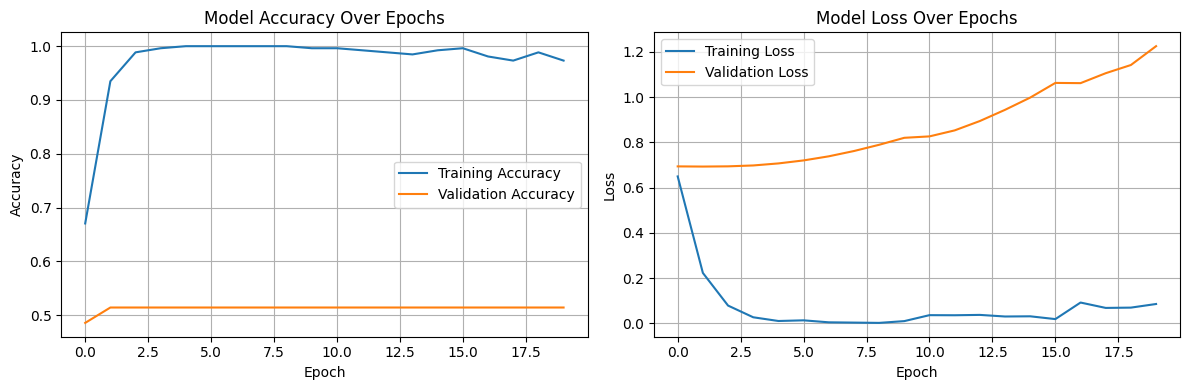

In [3]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=20, 
                    batch_size=32, 
                    validation_data=(X_val, y_val))

# Save the trained model
model.save("military_classifier_mobilenet.h5")

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

# ResNet architecture

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Parameters
IMG_SIZE = 32

# Residual block (simplified for efficiency)
def residual_block(x, filters, strides=(1, 1), downsample=False):
    shortcut = x
    
    # First conv layer
    x = layers.Conv2D(filters, kernel_size=3, strides=strides, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    
    # Second conv layer
    x = layers.Conv2D(filters, kernel_size=3, strides=(1, 1), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    
    # Downsample shortcut if needed
    if downsample or strides != (1, 1):
        shortcut = layers.Conv2D(filters, kernel_size=1, strides=strides, padding='same', use_bias=False)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)
    
    # Add shortcut and apply ReLU
    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)
    return x

# Build a lightweight ResNet model (inspired by ResNet-18)
def create_resnet_model():
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    # Initial convolution
    x = layers.Conv2D(32, kernel_size=3, strides=(1, 1), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)  # 32x32 → 16x16
    
    # Residual blocks (simplified from ResNet-18)
    x = residual_block(x, filters=32, strides=(1, 1))  # Block 1
    x = residual_block(x, filters=32, strides=(1, 1))
    x = residual_block(x, filters=64, strides=(2, 2), downsample=True)  # 16x16 → 8x8, Block 2
    x = residual_block(x, filters=64, strides=(1, 1))
    
    # Global pooling and classification
    x = layers.GlobalAveragePooling2D()(x)  # 8x8 → 64-d vector
    x = layers.Dense(1, activation='sigmoid')(x)  # Binary output
    
    model = models.Model(inputs, outputs=x)
    return model

# Initialize and compile the model
model = create_resnet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_13 (ReLU)     │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 16, 16,    │          0 │ re_lu_13[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 16, 16,    │      9,216 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        128 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_14 (ReLU)     │ (None, 16, 16,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 16, 16,    │      9,216 │ re_lu_14[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        128 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 16, 16,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_15 (ReLU)     │ (None, 16, 16,    │          0 │ add[0][0]         │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 16, 16,    │      9,216 │ re_lu_15[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        128 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_16 (ReLU)     │ (None, 16, 16,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 16, 16,    │      9,216 │ re_lu_16[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        128 │ conv2d_11[0][0] 

 Total params: 170,785 (667.13 KB)

 Trainable params: 169,825 (663.38 KB)

 Non-trainable params: 960 (3.75 KB)

## Train for 50 epochs

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 1.0000 - loss: 0.0064 - val_accuracy: 0.7257 - val_loss: 1.4086
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.9944 - loss: 0.0216 - val_accuracy: 0.7371 - val_loss: 1.1992
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 0.8000 - val_loss: 0.6743
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 0.8914 - val_loss: 0.3966
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9086 - val_loss: 0.2891
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.9257 - val_loss: 0.2364
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 0.9429 - val_loss: 0.2042
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.8971 - val_loss:

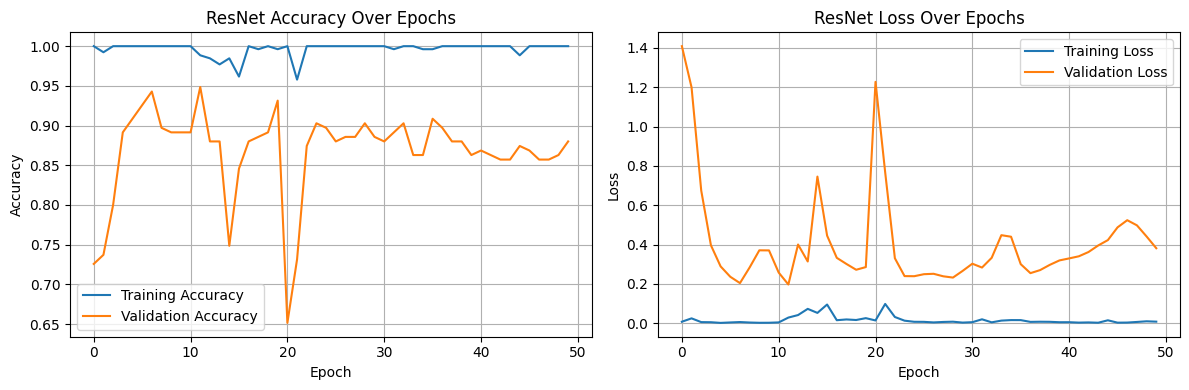

In [9]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=64, 
                    validation_data=(X_val, y_val))

# Save the trained model
model.save("military_classifier_resnet.h5")

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ResNet Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

# Inference from Model

In [24]:
# Load and preprocess a test image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    return np.expand_dims(img, axis=0)  # Add batch dimension

# Test on a sample image
test_image = preprocess_image("image copy.png")

prediction = model.predict(test_image)
print("Prediction:", "Military Person" if prediction[0][0] > 0.5 else "Person")

[ WARN:0@1379.248] global loadsave.cpp:268 findDecoder imread_('image copy.png'): can't open/read file: check file path/integrity


error: OpenCV(4.11.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


# Data Augmentation

In [10]:
!pip install opencv-python numpy albumentations tqdm

  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 3.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 3.3 MB/s eta 0:00:00a 0:00:01
Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)


In [1]:
# Install required libraries if not already installed (run this cell once)


# Import libraries
import os
import cv2
import numpy as np
import albumentations as A
from tqdm.notebook import tqdm  # Progress bar for notebooks
from pathlib import Path

# Parameters
DATA_DIR = "data"  # Root directory with 'person' and 'military_person' folders
CATEGORIES = ["person", "military_person"]
TARGET_COUNT = 500  # Target number of images per folder
ORIGINAL_COUNT = 219  # Current number of images per folder
AUGMENT_COUNT = TARGET_COUNT - ORIGINAL_COUNT  # Number of images to generate

# Define augmentation pipeline
augmentations = A.Compose([
    A.OneOf([
        A.GaussNoise(var_limit=(10.0, 50.0), p=0.5),  # Add Gaussian noise
        A.GaussianBlur(blur_limit=(3, 7), p=0.5),     # Apply Gaussian blur
    ], p=0.7),
    A.Rotate(limit=30, p=0.5),                         # Random rotation up to 30 degrees
    A.HorizontalFlip(p=0.5),                          # Horizontal flip
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),  # Brightness/contrast shift
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),  # Shift, scale, rotate
], p=1.0)  # Apply at least one augmentation per image

# Function to augment and save images
def augment_images(category, source_dir, augment_count):
    # Get list of original images
    image_files = [f for f in os.listdir(source_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
    if len(image_files) != ORIGINAL_COUNT:
        print(f"Warning: Found {len(image_files)} images in {category}, expected {ORIGINAL_COUNT}")
    
    # Calculate how many times to augment each original image
    images_per_original = augment_count // len(image_files)
    extra_images = augment_count % len(image_files)  # Handle remainder
    
    augmented_count = 0
    # Use tqdm for progress bar
    for i, img_file in tqdm(enumerate(image_files), total=len(image_files), desc=f"Augmenting {category}"):
        img_path = os.path.join(source_dir, img_file)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Failed to load {img_path}")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for albumentations
        
        # Generate augmented images
        num_augmentations = images_per_original + (1 if i < extra_images else 0)
        for j in range(num_augmentations):
            augmented = augmentations(image=img)['image']
            augmented = cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR)  # Convert back to BGR for saving
            
            # Save augmented image
            new_filename = f"{category}_aug_{augmented_count:04d}.jpg"
            save_path = os.path.join(source_dir, new_filename)
            cv2.imwrite(save_path, augmented)
            augmented_count += 1
    
    print(f"Generated {augmented_count} augmented images for {category}")


for category in CATEGORIES:
    folder_path = os.path.join(DATA_DIR, category)
    if not os.path.exists(folder_path):
        print(f"Error: Folder {folder_path} does not exist")
        continue
    
    # Count existing images
    current_count = len([f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))])
    print(f"Starting count for {category}: {current_count} images")
    
    # Augment images
    augment_images(category, folder_path, AUGMENT_COUNT)
    
    # Verify final count
    final_count = len([f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))])
    print(f"Final count for {category}: {final_count} images")



Starting count for person: 219 images


/var/folders/s3/k3nh4t5j0pl3086gd494qhgh0000gn/T/ipykernel_21592/1398041200.py:22: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(10.0, 50.0), p=0.5),  # Add Gaussian noise
/opt/anaconda3/envs/object_detection_env/lib/python3.11/site-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


Augmenting person:   0%|          | 0/219 [00:00<?, ?it/s]

Generated 281 augmented images for person
Final count for person: 500 images
Starting count for military_person: 217 images


Augmenting military_person:   0%|          | 0/217 [00:00<?, ?it/s]

Generated 281 augmented images for military_person
Final count for military_person: 498 images


# Pre processing script

In [1]:
import os

import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Parameters
IMG_SIZE = 32  # Small size for speed
DATA_DIR = "augmented_data"
CATEGORIES = ["person", "military_person"]

# Load and preprocess images
def load_data():
    data = []
    labels = []
    for category in CATEGORIES:
        path = os.path.join(DATA_DIR, category)
        class_num = CATEGORIES.index(category)  # 0 for person, 1 for military_person
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                img_array = img_array / 255.0  # Normalize to [0, 1]
                data.append(img_array)
                labels.append(class_num)
            except Exception as e:
                print(f"Error loading image: {e}")
    return np.array(data), np.array(labels)

# Load data
X, y = load_data()

# Split into train and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Validation samples: {X_val.shape[0]}")

Training samples: 598, Validation samples: 400


# Small CNN architecture without Dropout layer

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build the CNN model
def create_model():
    model = models.Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])
    return model

model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/opt/anaconda3/envs/object_detection_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78,945 (308.38 KB)

 Trainable params: 78,945 (308.38 KB)

 Non-trainable params: 0 (0.00 B)

## Training using 10 epochs

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6093 - loss: 0.6515 - val_accuracy: 0.7475 - val_loss: 0.5307
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7283 - loss: 0.5370 - val_accuracy: 0.7700 - val_loss: 0.4794
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7855 - loss: 0.4708 - val_accuracy: 0.7900 - val_loss: 0.4295
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8281 - loss: 0.3801 - val_accuracy: 0.8300 - val_loss: 0.3574
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8289 - loss: 0.3435 - val_accuracy: 0.8425 - val_loss: 0.3355
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8568 - loss: 0.2973 - val_accuracy: 0.8450 - val_loss: 0.3147
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8710 - loss: 0.2893 - val_accuracy: 0.8200 - val_loss: 0.3610
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8716 - loss: 0.2817 - val_accuracy: 0.8500 - val

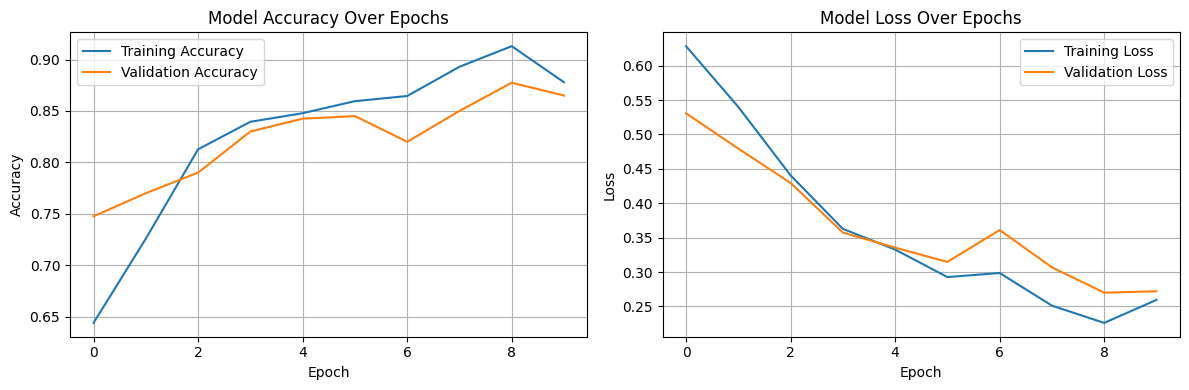

In [3]:
history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(X_val, y_val))

# model.save("military_classifier_50_epoch.h5")

from matplotlib import pyplot as plt
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot (optional, for extra insight)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Training using 20 epochs

Epoch 1/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5090 - loss: 0.6960 - val_accuracy: 0.7525 - val_loss: 0.6500
Epoch 2/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7743 - loss: 0.6244 - val_accuracy: 0.7800 - val_loss: 0.5029
Epoch 3/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7898 - loss: 0.4882 - val_accuracy: 0.7675 - val_loss: 0.4612
Epoch 4/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7354 - loss: 0.5430 - val_accuracy: 0.8550 - val_loss: 0.3661
Epoch 5/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8225 - loss: 0.3928 - val_accuracy: 0.7850 - val_loss: 0.4228
Epoch 6/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8118 - loss: 0.3697 - val_accuracy: 0.8200 - val_loss: 0.3660
Epoch 7/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8500 - loss: 0.3240 - val_accuracy: 0.8750 - val_loss: 0.2799
Epoch 8/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8982 - loss: 0.2551 - val_accuracy: 0.8900 - val_loss

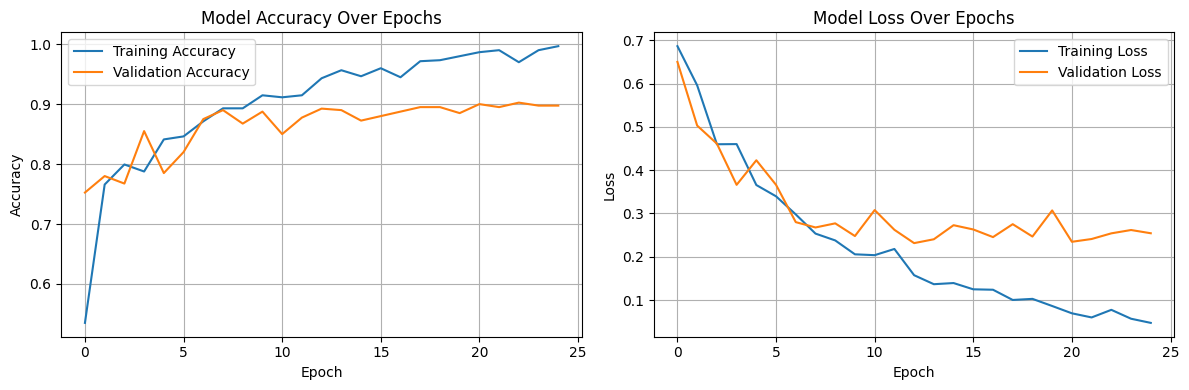

In [4]:

history = model.fit(X_train, y_train, 
                    epochs=25, 
                    batch_size=32, 
                    validation_data=(X_val, y_val))

# model.save("military_classifier_25_epoch.h5")

from matplotlib import pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# CNN architecture including a Dropout layer

## Updating the model architectuire with a dropout layer

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_model():
    model = models.Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),  # Heavier dropout for dense layer

        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])

    return model

model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/opt/anaconda3/envs/object_detection_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,609 (221.13 KB)

 Trainable params: 56,609 (221.13 KB)

 Non-trainable params: 0 (0.00 B)

## Training for 25 epochs

Epoch 1/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5211 - loss: 0.7041 - val_accuracy: 0.4825 - val_loss: 0.6828
Epoch 2/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5912 - loss: 0.6692 - val_accuracy: 0.7775 - val_loss: 0.6320
Epoch 3/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6921 - loss: 0.6091 - val_accuracy: 0.7700 - val_loss: 0.5250
Epoch 4/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7625 - loss: 0.5319 - val_accuracy: 0.7000 - val_loss: 0.5571
Epoch 5/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7533 - loss: 0.4917 - val_accuracy: 0.8100 - val_loss: 0.4693
Epoch 6/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7818 - loss: 0.4872 - val_accuracy: 0.7975 - val_loss: 0.4523
Epoch 7/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7691 - loss: 0.4764 - val_accuracy: 0.8375 - val_loss: 0.3958
Epoch 8/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8147 - loss: 0.4147 - val_accuracy: 0.8025 - v

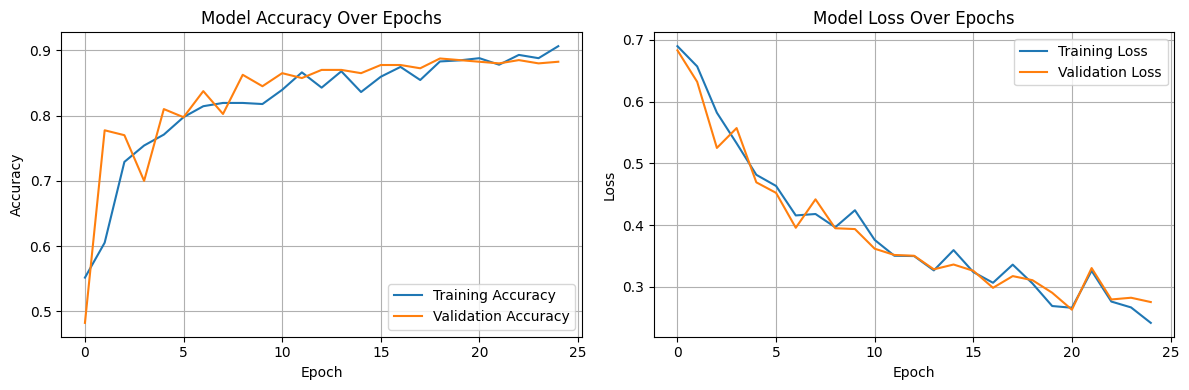

In [3]:
# Train the model
history = model.fit(X_train, y_train, 
                    epochs=25, 
                    batch_size=32, 
                    validation_data=(X_val, y_val))

model.save("military_classifier_25_epoch.h5")

from matplotlib import pyplot as plt
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


In [4]:
model.save("military_classifier_25_epoch.keras")

## Train the model for 50 epochs


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4319 - loss: 0.7578 - val_accuracy: 0.5050 - val_loss: 0.6902
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5701 - loss: 0.6889 - val_accuracy: 0.4775 - val_loss: 0.6871
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5631 - loss: 0.6797 - val_accuracy: 0.7450 - val_loss: 0.6628
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6482 - loss: 0.6463 - val_accuracy: 0.6900 - val_loss: 0.6014
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7243 - loss: 0.5575 - val_accuracy: 0.7650 - val_loss: 0.4974
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7571 - loss: 0.5157 - val_accuracy: 0.7900 - val_loss: 0.4924
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7718 - loss: 0.4880 - val_accuracy: 0.8025 - val_loss: 0.4843
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7666 - loss: 0.4928 - val_accuracy: 0.8000 - v

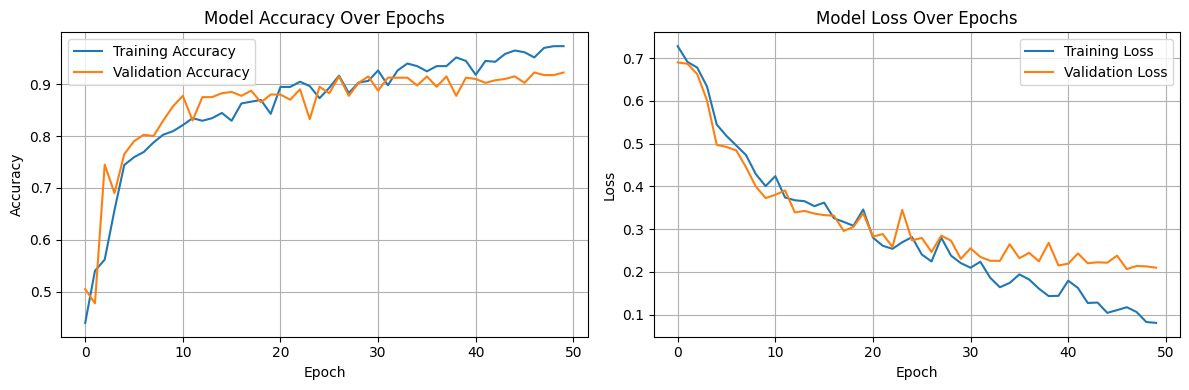

In [3]:
# Train the model
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_data=(X_val, y_val))

# Save the trained model
model.save("military_classifier_50_epoch.keras")

from matplotlib import pyplot as plt
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot (optional, for extra insight)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


# MobileNetV1 Architecture

Found 998 files belonging to 2 classes.
Using 799 files for training.
Found 998 files belonging to 2 classes.
Using 199 files for validation.
Classes: ['military_person', 'person']

Training MobileNetV2...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 518ms/step - accuracy: 0.5596 - loss: 0.7591 - val_accuracy: 0.9548 - val_loss: 0.2856
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 755ms/step - accuracy: 0.8563 - loss: 0.3447 - val_accuracy: 0.9749 - val_loss: 0.1645
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 614ms/step - accuracy: 0.9145 - loss: 0.2298 - val_accuracy: 0.9799 - val_loss: 0.1199
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 625ms/step - accuracy: 0.9283 - loss: 0.1877 - val_accuracy: 0.9849 - val_loss: 0.0973
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 614ms/step - accuracy: 0.9485 - loss: 0.1534 - val_accuracy: 0.9849 - val_loss: 0.0826
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 627ms/step - accuracy: 0.9510 - loss: 0.1304 - val_accurac

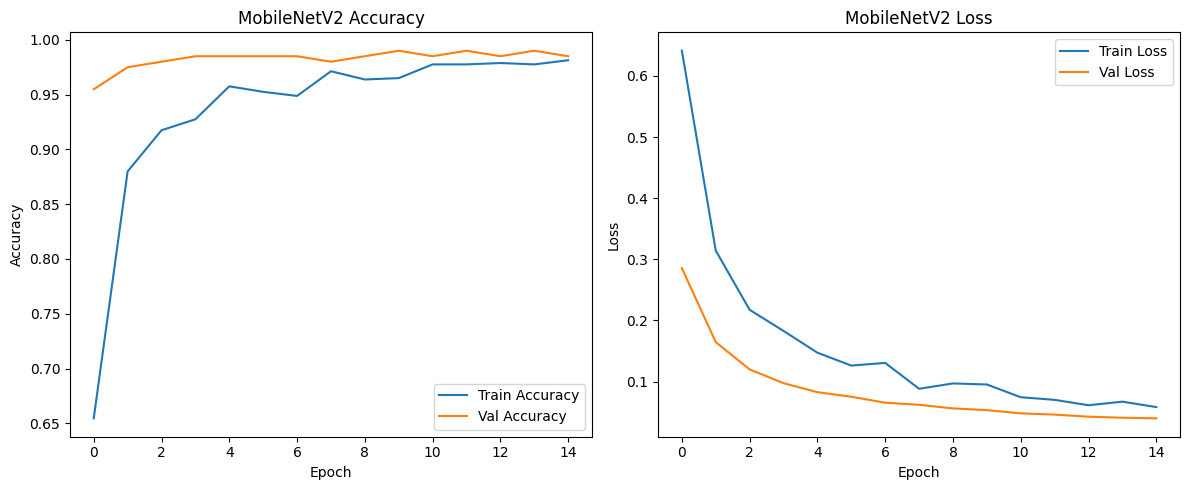

In [6]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50, MobileNetV2
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 15
DATA_DIR = "augmented_data"
AUTOTUNE = tf.data.AUTOTUNE

# Load training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

# Load validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

# Get class names (before prefetch!)
class_names = train_ds.class_names
print("Classes:", class_names)

# Prefetch for performance
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# ==============================
# Model Builder Functions
# ==============================

# def build_resnet_model():
#     base_model = ResNet50(include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet')
#     base_model.trainable = False  # freeze base

#     model = models.Sequential([
#         layers.Lambda(resnet_preprocess),
#         base_model,
#         layers.GlobalAveragePooling2D(),
#         layers.Dropout(0.3),
#         layers.Dense(128, activation='relu'),
#         layers.Dropout(0.3),
#         layers.Dense(1, activation='sigmoid')
#     ])
#     model.compile(optimizer=Adam(learning_rate=1e-4),
#                   loss='binary_crossentropy',
#                   metrics=['accuracy'])
#     return model

def build_mobilenet_model():
    base_model = MobileNetV2(include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet')
    base_model.trainable = False

    model = models.Sequential([
        layers.Lambda(mobilenet_preprocess),
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# ==============================
# Plotting Function
# ==============================

def plot_training_history(history, title="Model"):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Val Accuracy')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Val Loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# ==============================
# Train and Plot
# ==============================

callbacks = [EarlyStopping(patience=3, restore_best_weights=True)]

# Train ResNet50
# print("\nTraining ResNet50...")
# resnet_model = build_resnet_model()
# resnet_history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS, callbacks=callbacks)
# plot_training_history(resnet_history, title="ResNet50")

# Train MobileNetV2
print("\nTraining MobileNetV2...")
mobilenet_model = build_mobilenet_model()
mobilenet_history = mobilenet_model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS, callbacks=callbacks)
plot_training_history(mobilenet_history, title="MobileNetV2")


# ResNet architecture

## Train for 10 epoch

Found 998 files belonging to 2 classes.
Using 599 files for training.
Found 998 files belonging to 2 classes.
Using 399 files for validation.
Classes: ['military_person', 'person']

Training ResNet50...
Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 74s 4s/step - accuracy: 0.6476 - loss: 0.6677 - val_accuracy: 0.9624 - val_loss: 0.1944
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.9253 - loss: 0.2365 - val_accuracy: 0.9749 - val_loss: 0.1052
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 68s 4s/step - accuracy: 0.9678 - loss: 0.1156 - val_accuracy: 0.9850 - val_loss: 0.0747
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 70s 4s/step - accuracy: 0.9653 - loss: 0.0874 - val_accuracy: 0.9875 - val_loss: 0.0620
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 70s 4s/step - accuracy: 0.9721 - loss: 0.0788 - val_accuracy: 0.9875 - val_loss: 0.0541
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.9803 - loss: 0.0581 - val_accuracy: 0.9900 - val_loss: 0.0447
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 65s

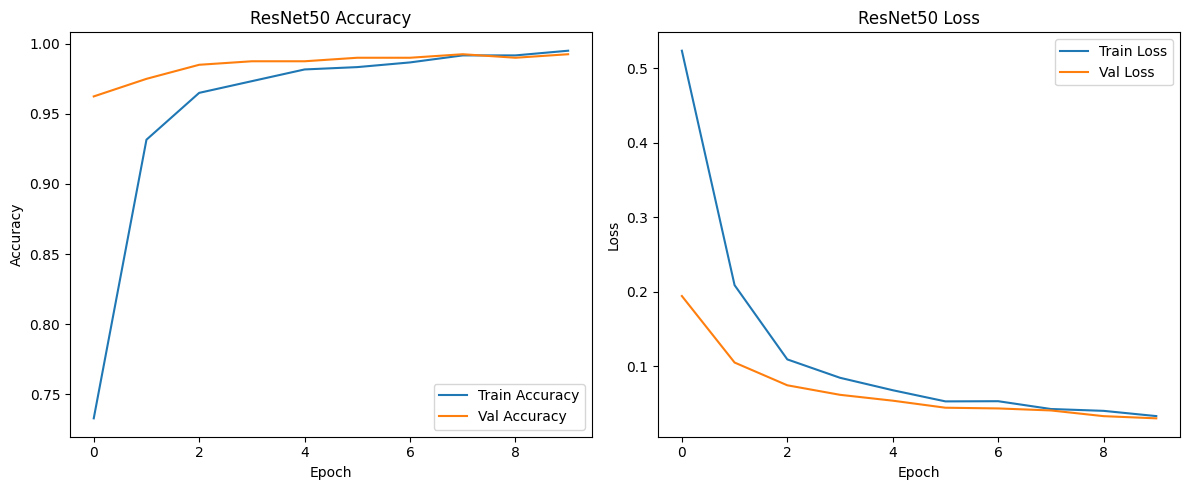

In [2]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50, MobileNetV2
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 10
DATA_DIR = "augmented_data"
AUTOTUNE = tf.data.AUTOTUNE

# Load training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.4,
    subset="training",
    seed=42,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

# Load validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.4,
    subset="validation",
    seed=42,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

# Get class names (before prefetch!)
class_names = train_ds.class_names
print("Classes:", class_names)

# Prefetch for performance
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# ==============================
# Model Builder Functions
# ==============================

def build_resnet_model():
    base_model = ResNet50(include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet')
    base_model.trainable = False  # freeze base

    model = models.Sequential([
        layers.Lambda(resnet_preprocess),
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

def plot_training_history(history, title="Model"):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Val Accuracy')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Val Loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# ==============================
# Train and Plot
# ==============================

callbacks = [EarlyStopping(patience=3, restore_best_weights=True)]

print("\nTraining ResNet50...")
resnet_model = build_resnet_model()
resnet_history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS, callbacks=callbacks)
plot_training_history(resnet_history, title="ResNet50")


## Train for 50 epochs

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 1.0000 - loss: 0.0064 - val_accuracy: 0.7257 - val_loss: 1.4086
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.9944 - loss: 0.0216 - val_accuracy: 0.7371 - val_loss: 1.1992
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 0.8000 - val_loss: 0.6743
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 0.8914 - val_loss: 0.3966
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9086 - val_loss: 0.2891
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.9257 - val_loss: 0.2364
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 0.9429 - val_loss: 0.2042
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.8971 - val_loss:

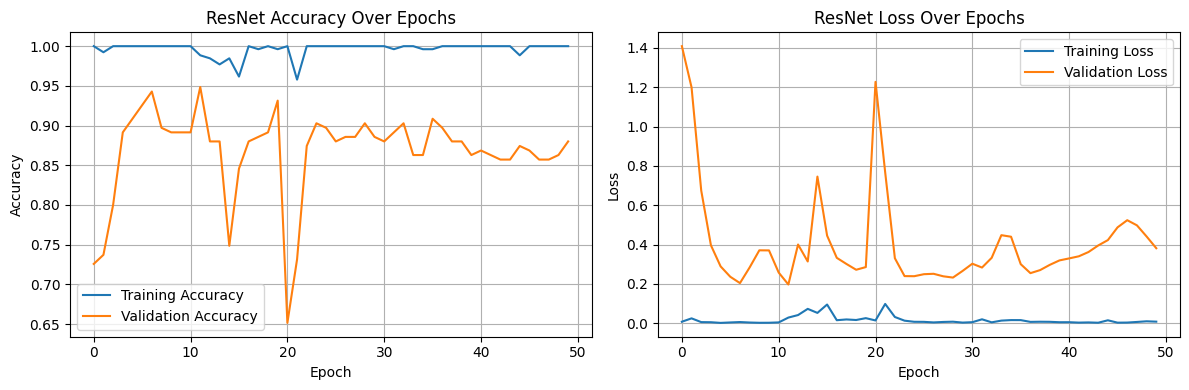

In [ ]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=64, 
                    validation_data=(X_val, y_val))

# Save the trained model
model.save("military_classifier_resnet.h5")

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ResNet Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

# Inference from Model

In [15]:
# # Load and preprocess a test image
# def preprocess_image(image_path):
#     img = cv2.imread(image_path)
#     img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
#     img = img / 255.0
#     return np.expand_dims(img, axis=0)  # Add batch dimension

# # Test on a sample image
# test_image = preprocess_image("image_copy.jpg")

# prediction = model.predict(test_image)
# print("Prediction:", "Military Person" if prediction[0][0] > 0.5 else "Person")
import cv2
import numpy as np
# from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess

# Choose model & preprocessing based on what you're testing
MODEL = mobilenet_model  # or mobilenet_model
PREPROCESS = mobilenet_preprocess  # or mobilenet_preprocess

# Function to preprocess image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = PREPROCESS(img.astype(np.float32))
    return np.expand_dims(img, axis=0)  # Add batch dimension

# Test on a sample image
test_image = preprocess_image("image_copy.png")
prediction = MODEL.predict(test_image)

# Show prediction
confidence = prediction[0][0]
label = "Military Person" if confidence > 0.5 else "Person"
print(f"Prediction: {label} (Confidence: {confidence:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: Military Person (Confidence: 0.76)


# Convert to tf_lite

In [4]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model("military_classifier_50_epoch.keras")

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Optimize for size/performance
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]  # Basic ops only
converter.inference_input_type = tf.float32
converter.inference_output_type = tf.float32

tflite_model = converter.convert()

# Save the TFLite model
with open("military_classifier_50_epoch.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/s3/k3nh4t5j0pl3086gd494qhgh0000gn/T/tmpo2n01vr2/assets


INFO:tensorflow:Assets written to: /var/folders/s3/k3nh4t5j0pl3086gd494qhgh0000gn/T/tmpo2n01vr2/assets


Saved artifact at '/var/folders/s3/k3nh4t5j0pl3086gd494qhgh0000gn/T/tmpo2n01vr2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  6078239696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6078240656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6078239312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6078242384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6078241808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6078243152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6078242576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6078243920: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1743861909.177327 2544376 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1743861909.177351 2544376 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-04-05 19:35:09.177717: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/s3/k3nh4t5j0pl3086gd494qhgh0000gn/T/tmpo2n01vr2
2025-04-05 19:35:09.178366: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-05 19:35:09.178374: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/s3/k3nh4t5j0pl3086gd494qhgh0000gn/T/tmpo2n01vr2
I0000 00:00:1743861909.183096 2544376 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-04-05 19:35:09.183926: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-05 19:35:09.215416: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folder

# Tflite on Mac

In [6]:
# Import libraries
from tensorflow.lite.python.interpreter import Interpreter
import numpy as np
import cv2

# Define image size (ensure this matches your model's training size)
IMG_SIZE = 32  # Adjust if your model was trained on a different size

# Load TFLite model
interpreter = Interpreter(model_path="military_classifier_50_epoch.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Print input details for debugging (optional)
print("Input details:", input_details)

# Preprocess an image for inference
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Failed to load image at {image_path}")
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0  # Normalize to [0, 1]
    img = img.astype(np.float32)  # Explicitly cast to float32
    return np.expand_dims(img, axis=0)  # Add batch dimension

# Load and preprocess image
test_image = preprocess_image("image_copy.png")

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], test_image)

# Run the model
interpreter.invoke()

# Get output tensor
output = interpreter.get_tensor(output_details[0]['index'])

# Interpret the output
prediction = "Military Person" if output[0][0] > 0.5 else "Person"
print("Prediction:", prediction)
print("Raw output score:", output[0][0])

Input details: [{'name': 'serving_default_input_layer:0', 'index': 0, 'shape': array([ 1, 32, 32,  3], dtype=int32), 'shape_signature': array([-1, 32, 32,  3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Prediction: Person
Raw output score: 0.08472113


# tflite on raspberrypi

In [ ]:
from tflite_runtime.interpreter import Interpreter

import numpy as np
import cv2
import os

# Define image size (must match your model's training size)
IMG_SIZE = 32  # Adjust if your model was trained on a different size

# Model and image paths
MODEL_PATH = "optimized_model.tflite"
TEST_IMAGE_PATH = "image_copy.png"

# Load TFLite model
def load_model(model_path):
    if not os.path.exists(model_path):
        raise FileNotFoundError(f"Model file not found at {model_path}")
    interpreter = Interpreter(model_path=model_path)
    interpreter.allocate_tensors()
    return interpreter

# Preprocess an image for inference
def preprocess_image(image_path):
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found at {image_path}")
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Failed to load image at {image_path}")
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0  # Normalize to [0, 1]
    img = img.astype(np.float32)  # Cast to float32 for TFLite
    return np.expand_dims(img, axis=0)  # Add batch dimension

# Main function
# def run_inference():
# Load model
interpreter = load_model(MODEL_PATH)

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input details:", input_details)  # Debugging

# Load and preprocess image
test_image = preprocess_image(TEST_IMAGE_PATH)

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], test_image)

# Run the model
interpreter.invoke()

# Get output tensor
output = interpreter.get_tensor(output_details[0]['index'])

# Interpret the output
prediction = "Military Person" if output[0][0] > 0.5 else "Person"
print("Prediction:", prediction)
print("Raw output score:", output[0][0])

ERROR: Could not find a version that satisfies the requirement tflite-runtime (from versions: none)
ERROR: No matching distribution found for tflite-runtime
